In [4]:
import pickle
import sys
from concurrent.futures import ProcessPoolExecutor, as_completed

import biosppy.signals.tools as st
import numpy as np
import os
import wfdb
from biosppy.signals.ecg import correct_rpeaks, hamilton_segmenter
from scipy.signal import medfilt

from tqdm import tqdm

In [1]:
# PhysioNet Apnea-ECG dataset
# url: https://physionet.org/physiobank/database/apnea-ecg/
base_dir = "dataset"

fs = 100
sample = fs * 60  # 1 min's sample points

before = 2  # forward interval (min)
after = 2  # backward interval (min)
hr_min = 20
hr_max = 300

num_worker = 35 

In [2]:
names = [
        "a01", "a02", "a03", "a04", "a05", "a06", "a07", "a08", "a09", "a10",
        "a11", "a12", "a13", "a14", "a15", "a16", "a17", "a18", "a19", "a20",
        "b01", "b02", "b03", "b04", "b05",
        "c01", "c02", "c03", "c04", "c05", "c06", "c07", "c08", "c09", "c10"
    ]

In [16]:
name = names[1]

In [5]:
signals = wfdb.rdrecord(os.path.join(base_dir, names[1]), channels=[0]).p_signal[:, 0]

In [7]:
import matplotlib.pyplot as plt

In [9]:
signals

array([-0.02 , -0.02 , -0.025, ...,  0.   ,  0.   ,  0.   ])

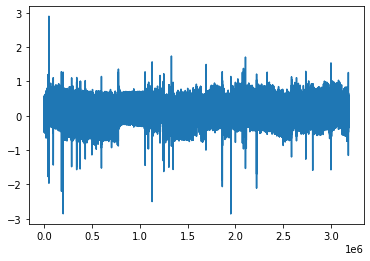

In [8]:
plt.plot(signals)


In [13]:
labels = wfdb.rdann(os.path.join(base_dir, names[1]), extension="apn").symbol

In [24]:
if j < before or \
    (j + 1 + after) > len(signals) / float(sample):
        print("hello")

In [25]:
for j in tqdm(range(len(labels)), desc=name, file=sys.stdout):
    if j < before or \
        (j + 1 + after) > len(signals) / float(sample):
        continue
    signal = signals[int((j - before) * sample):int((j + 1 + after) * sample)]
    # signal, _, _ = st.filter_signal(signal, ftype='FIR', band='bandpass', order=int(0.3 * fs),
    #                                     frequency=[3, 45], sampling_rate=fs)

a02: 100%|██████████| 528/528 [00:00<00:00, 120162.37it/s]


In [26]:
signal

array([-0.055, -0.035,  0.255, ...,  0.025,  0.03 ,  0.075])

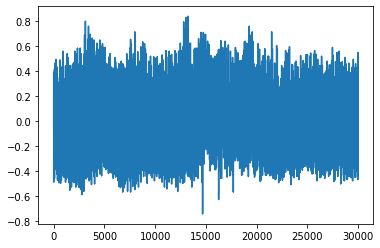

In [27]:
plt.plot(signal)

In [28]:
rpeaks, = hamilton_segmenter(signal, sampling_rate=fs)

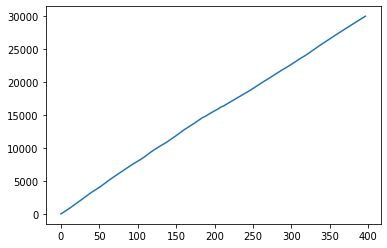

In [29]:
plt.plot(rpeaks)

In [30]:
rpeaks, = correct_rpeaks(signal, rpeaks=rpeaks, sampling_rate=fs, tol=0.1)

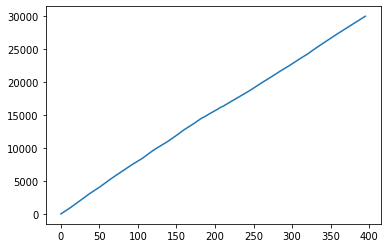

In [31]:
plt.plot(rpeaks)

In [ ]:
if len(rpeaks) / (1 + after + before) < 40 or \
    len(rpeaks) / (1 + after + before) > 200:  # Remove abnormal R peaks signal
    continue

In [33]:
rri_tm, rri_signal = rpeaks[1:] / float(fs), np.diff(rpeaks) / float(fs)
rri_signal = medfilt(rri_signal, kernel_size=3)
ampl_tm, ampl_siganl = rpeaks / float(fs), signal[rpeaks]
hr = 60 / rri_signal

In [36]:
rri_signal

array([0.75, 0.75, 0.74, 0.74, 0.74, 0.75, 0.77, 0.77, 0.78, 0.8 , 0.81,
       0.82, 0.82, 0.84, 0.84, 0.84, 0.83, 0.85, 0.83, 0.85, 0.83, 0.85,
       0.85, 0.85, 0.86, 0.82, 0.87, 0.85, 0.87, 0.88, 0.88, 0.89, 0.88,
       0.88, 0.87, 0.83, 0.81, 0.79, 0.76, 0.75, 0.74, 0.74, 0.74, 0.74,
       0.74, 0.74, 0.75, 0.76, 0.79, 0.82, 0.82, 0.87, 0.87, 0.87, 0.89,
       0.89, 0.89, 0.87, 0.85, 0.85, 0.85, 0.84, 0.83, 0.83, 0.83, 0.81,
       0.81, 0.8 , 0.8 , 0.77, 0.77, 0.77, 0.77, 0.79, 0.79, 0.79, 0.8 ,
       0.8 , 0.77, 0.76, 0.76, 0.76, 0.78, 0.78, 0.8 , 0.8 , 0.8 , 0.8 ,
       0.79, 0.77, 0.76, 0.75, 0.73, 0.7 , 0.7 , 0.7 , 0.69, 0.7 , 0.7 ,
       0.7 , 0.7 , 0.71, 0.73, 0.73, 0.77, 0.79, 0.84, 0.87, 0.89, 0.91,
       0.91, 0.88, 0.87, 0.86, 0.83, 0.82, 0.82, 0.82, 0.81, 0.79, 0.78,
       0.75, 0.74, 0.72, 0.7 , 0.7 , 0.69, 0.68, 0.68, 0.69, 0.69, 0.69,
       0.7 , 0.72, 0.72, 0.72, 0.74, 0.76, 0.76, 0.79, 0.79, 0.79, 0.78,
       0.79, 0.79, 0.79, 0.8 , 0.8 , 0.83, 0.87, 0.

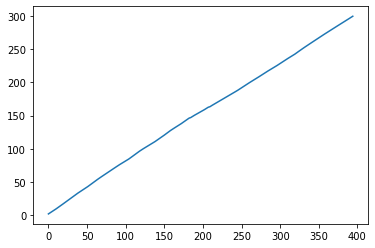

In [41]:
plt.plot(rri_tm)

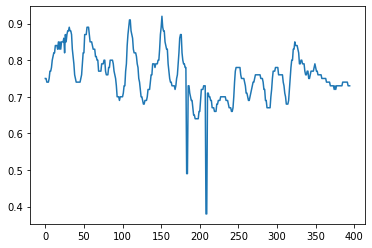

In [35]:
plt.plot(rri_signal)

In [37]:
ampl_tm, ampl_siganl = rpeaks / float(fs), signal[rpeaks]
hr = 60 / rri_signal

In [38]:
ampl_siganl

array([0.415, 0.465, 0.495, 0.435, 0.35 , 0.31 , 0.28 , 0.49 , 0.295,
       0.43 , 0.435, 0.56 , 0.34 , 0.33 , 0.44 , 0.445, 0.54 , 0.51 ,
       0.32 , 0.445, 0.445, 0.41 , 0.345, 0.46 , 0.47 , 0.56 , 0.54 ,
       0.435, 0.585, 0.455, 0.36 , 0.585, 0.54 , 0.445, 0.375, 0.535,
       0.69 , 0.8  , 0.55 , 0.565, 0.655, 0.76 , 0.51 , 0.695, 0.55 ,
       0.49 , 0.665, 0.585, 0.65 , 0.56 , 0.505, 0.525, 0.625, 0.45 ,
       0.575, 0.65 , 0.6  , 0.37 , 0.62 , 0.59 , 0.49 , 0.59 , 0.375,
       0.46 , 0.39 , 0.415, 0.515, 0.54 , 0.435, 0.385, 0.425, 0.405,
       0.425, 0.51 , 0.475, 0.425, 0.415, 0.385, 0.46 , 0.39 , 0.325,
       0.48 , 0.325, 0.46 , 0.445, 0.38 , 0.425, 0.365, 0.54 , 0.375,
       0.47 , 0.49 , 0.585, 0.655, 0.62 , 0.495, 0.35 , 0.54 , 0.44 ,
       0.715, 0.37 , 0.44 , 0.39 , 0.555, 0.37 , 0.48 , 0.375, 0.595,
       0.48 , 0.635, 0.585, 0.62 , 0.575, 0.54 , 0.365, 0.38 , 0.48 ,
       0.35 , 0.52 , 0.445, 0.31 , 0.35 , 0.515, 0.39 , 0.505, 0.495,
       0.39 , 0.515,

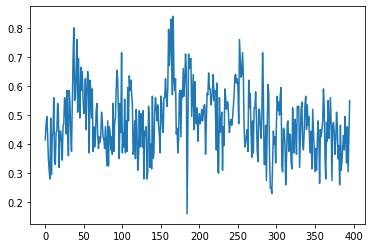

In [39]:
plt.plot(ampl_siganl)

In [ ]:
X = []
y = []
groups = []
signals = wfdb.rdrecord(os.path.join(base_dir, name), channels=[0]).p_signal[:, 0]
for j in tqdm(range(len(labels)), desc=name, file=sys.stdout):
    if j < before or \
        (j + 1 + after) > len(signals) / float(sample):
        continue
    signal = signals[int((j - before) * sample):int((j + 1 + after) * sample)]
    signal, _, _ = st.filter_signal(signal, ftype='FIR', band='bandpass', order=int(0.3 * fs),
                                        frequency=[3, 45], sampling_rate=fs)
    # Find R peaks
    rpeaks, = hamilton_segmenter(signal, sampling_rate=fs)
    rpeaks, = correct_rpeaks(signal, rpeaks=rpeaks, sampling_rate=fs, tol=0.1)
    if len(rpeaks) / (1 + after + before) < 40 or \
            len(rpeaks) / (1 + after + before) > 200:  # Remove abnormal R peaks signal
        continue
    # Extract RRI, Ampl signal
    rri_tm, rri_signal = rpeaks[1:] / float(fs), np.diff(rpeaks) / float(fs)
    rri_signal = medfilt(rri_signal, kernel_size=3)
    ampl_tm, ampl_siganl = rpeaks / float(fs), signal[rpeaks]
    hr = 60 / rri_signal
    # Remove physiologically impossible HR signal
    if np.all(np.logical_and(hr >= hr_min, hr <= hr_max)):
        # Save extracted signal
        X.append([(rri_tm, rri_signal), (ampl_tm, ampl_siganl)])
        y.append(0. if labels[j] == 'N' else 1.)
        groups.append(name)
return X, y, groups




In [ ]:
if __name__ == "__main__":
    apnea_ecg = {}

    names = [
        "a01", "a02", "a03", "a04", "a05", "a06", "a07", "a08", "a09", "a10",
        "a11", "a12", "a13", "a14", "a15", "a16", "a17", "a18", "a19", "a20",
        "b01", "b02", "b03", "b04", "b05",
        "c01", "c02", "c03", "c04", "c05", "c06", "c07", "c08", "c09", "c10"
    ]

    o_train = []
    y_train = []
    groups_train = []
    print('Training...')
    with ProcessPoolExecutor(max_workers=num_worker) as executor:
        task_list = []
        for i in range(len(names)):
            labels = wfdb.rdann(os.path.join(base_dir, names[i]), extension="apn").symbol
            task_list.append(executor.submit(worker, names[i], labels))

        for task in as_completed(task_list):
            X, y, groups = task.result()
            o_train.extend(X)
            y_train.extend(y)
            groups_train.extend(groups)

    print()

    answers = {}
    with open(os.path.join(base_dir, "event-2-answers"), "r") as f:
        for answer in f.read().split("\n\n"):
            answers[answer[:3]] = list("".join(answer.split()[2::2]))

    names = [
        "x01", "x02", "x03", "x04", "x05", "x06", "x07", "x08", "x09", "x10",
        "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20",
        "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30",
        "x31", "x32", "x33", "x34", "x35"
    ]

    o_test = []
    y_test = []
    groups_test = []
    print("Testing...")
    with ProcessPoolExecutor(max_workers=num_worker) as executor:
        task_list = []
        for i in range(len(names)):
            labels = answers[names[i]]
            task_list.append(executor.submit(worker, names[i], labels))

        for task in as_completed(task_list):
            X, y, groups = task.result()
            o_test.extend(X)
            y_test.extend(y)
            groups_test.extend(groups)

    apnea_ecg = dict(o_train=o_train, y_train=y_train, groups_train=groups_train, o_test=o_test, y_test=y_test,
                     groups_test=groups_test)
    with open(os.path.join(base_dir, "apnea-ecg.pkl"), "wb") as f:
        pickle.dump(apnea_ecg, f, protocol=2)

    print("\nok!")